# ULS Risley Prism Scanner Demo

Notebook: Hannah Weiser & Sina Zumstein, 2023

This demo scene showcases various toyblock models scanned by UAV-borne laserscanning. We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point clouds.



In [1]:
import sys, os
from pathlib import Path
from IPython.display import Code

current_folder = globals()["_dh"][0]
helios_path = str(Path(current_folder).parent)
sys.path.append(helios_path)  # add helios-plusplus directory to PATH
import pyhelios

from pyhelios.util.xmldisplayer import display_xml, find_playback_dir

## Survey
Let us look at the XML files in the simulation. First, we investigate the survey XML file, `uls_toyblocks_livox.xml`:

In [2]:
os.chdir(helios_path)
Code(display_xml(r'data\surveys\toyblocks\uls_toyblocks_livox.xml'), language='XML')

<document>
	<scannerSettings id="template1" active="true" pulseFreq_hz="100000" scanAngle_deg="23" /> 
	<survey name="toyblocks_uls_livox" platform="data/platforms.xml#copter_linearpath" scanner="data/scanners_als.xml#livox_mid-70" scene="data/scenes/toyblocks/toyblocks_scene.xml#toyblocks_scene">
	<!-- platform: quadcopter, deflector: rotating -->
		<leg>
			<platformSettings x="-80.0" y="-50.0" z="35.000" onGround="false" movePerSec_m="5" />
			<scannerSettings template="template1" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="80.0" y="-50.0" z="35.000" onGround="false" movePerSec_m="5" />
			<scannerSettings template="template1" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="-80.0" y="50.0" z="35.000" onGround="false" movePerSec_m="5" />
			<scannerSettings template="template1" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="80.0" y="50.0" z="35.000" onGround="false" movePerSec_m="5" />
			<scannerSettings template="template1" trajectoryTimeInterval_s="0.05" />
		</leg>
	</survey>
</document>

Here we see 4 `leg` elements (resulting in three flight strips) which define the waypoints of the trajectory of the platform (`copter_linearpath` UAV) and the speed between these waypoints (`movePerSec_m`). 


## Scanner

Now let's have a look how a scanner with a risley prism is defined. Here, the [`livox_mid-70`](https://www.livoxtech.com/de/mid-70), defined in `data/scanners_tls.xml` is used:

In [3]:
Code(display_xml('data/scanners_tls.xml', 'livox_mid-70'), language='XML')

<scanner id="livox_mid-70" accuracy_m="0.02" beamDivergence_rad="0.0027" name="Livox Mid-70" optics="risley" pulseFreqs_Hz="100000" pulseLength_ns="4" rangeMin_m="2" scanAngleMax_deg="35" scanAngleEffectiveMax_deg="35" rotorFreq1_Hz="7294" rotorFreq2_Hz="-4664" wavelength_nm="905">
				
		<FWFSettings beamSampleQuality="3" />
		<beamOrigin x="0" y="0" z="0">

			<rot axis="z" angle_deg="-90" />
		</beamOrigin>

		<headRotateAxis x="1" y="0" z="0" />
	</scanner>

For this deflector type, the scan pattern is controlled by the rotation speeds (`rotorFreq1_Hz` and `rotorFreq2_Hz`) of two rotating risley prisms. This design on which the low-cost Livox scanners are based is described in detail in [Liu et al. (2022)](https://doi.org/10.1109/TMECH.2021.3058173).

More information on the Livox sensors and their point cloud characteristics can be obtained from the [Livox Wiki](https://livox-wiki-en.readthedocs.io/en/latest/introduction/Point_Cloud_Characteristics_and_Coordinate_System%20.html).

For further reading on rotational risley prisms, see [Duma & Schitea (2018)](https://acad.ro/sectii2002/proceedings/doc2018-1/08.pdf).

## Platform

In [6]:
Code(display_xml(r'data/platforms.xml', 'copter_linearpath'))

<platform id="copter_linearpath" name="Quadrocopter UAV" type="linearpath">
		<scannerMount x="0" y="0" z="0.2">
			<rot axis="x" angle_deg="175" />
		</scannerMount>
		<!--<positionXNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<positionYNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<positionZNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.02"/>
		<attitudeXNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.001"/>
		<attitudeYNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.001"/>
		<attitudeZNoise
			clipMin="0.0" clipMax="0.0" clipEnabled="false" fixedLifespan="1"
			type="NORMAL" mean="0.0" stdev="0.001"/>-->
	</platform>

This is a `linearpath` type platform, a mobile platform which moves in a straight line between consecutive legs with a constant speed provided by the user.

We saw earlier, that the scanner is pointing upwards (and scanning left-to-right). Using the `scannerMount`, the platform is now rotated around the x axis by 175°, resulting in a 5° tilt back off-nadir. This way, we simulate the forward pitch of multirotor drones when heading forwards.

# Scene
Now we will have a look at the scene, `toyblocks_scene.xml` in `data/scenes/toyblocks/toyblocks_scene.xml`:

In [7]:
Code(display_xml(r'data/scenes/toyblocks/toyblocks_scene.xml', 'toyblocks_scene'))

<scene id="toyblocks_scene" name="ToyblocksScene">
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/basic/groundplane/groundplane.obj" />
            </filter>
            <filter type="scale">
                <param type="double" key="scale" value="70" />
            </filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="20.0;0;0" />
			</filter>
        </part>
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/cube.obj" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="1" />
            </filter>
        </part>
		<part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/cube.obj" />
            </filter>
			<filter type="rotate">
				<param key="rotation" type="rotation">
					<rot angle_deg="45" axis="z" />
				</param>
			</filter>
			<filter type="scale">
                <param type="double" key="scale" value="0.5" />
            </filter>
			<filter type="translate">
				<param type="integer" key="onGround" value="-1" />
				<param type="vec3" key="offset" value="-45.0;10.0;10" />
			</filter>
        </part>
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/sphere.obj" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="0.5" />
            </filter>
        </part>
         <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/cylinder.obj" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="1" />
            </filter>
        </part>
    </scene>

 Here we see different objects, which compose the scene: the `groundplane.obj`, `cube.obj` twice, `sphere.obj` and the `cylinder.obj`. The second `cube.obj` is rotated. The `sphere.obj` is scaled. To load them, the `objloader` filter is being used.

## Executing the Simulation

Next, we will run the simulation. In Jupyter Notebooks, we can run external commands with the `!command` syntax, but you can also just run it from the command line.

In [8]:
!"run/helios.exe" data/surveys/toyblocks/uls_toyblocks_livox.xml
output_path = find_playback_dir("data/surveys/toyblocks/uls_toyblocks_livox.xml")

HELIOS++ VERSION 1.1.1

CWD: "D:\helios"
seed: AUTO
surveyPath: "data/surveys/toyblocks/uls_toyblocks_livox.xml"
assetsPath: "assets/"
outputPath: "output/"
writeWaveform: 0
calcEchowidth: 0
fullWaveNoise: 0
splitByChannel: 0
parallelization: 1
njobs: 0
chunkSize: 32
warehouseFactor: 4
platformNoiseDisabled: 0
legNoiseDisabled: 0
rebuildScene: 0
lasOutput: 0
las10: 0
fixedIncidenceAngle: 0
gpsStartTime: 
kdtType: 4
kdtJobs: 0
kdtGeomJobs: 0
sahLossNodes: 32

xmlDocFilename: uls_toyblocks_livox.xml
xmlDocFilePath: data/surveys/toyblocks
xmlDocFilename: scanners_als.xml
xmlDocFilePath: data
Using default value for attribute 'averagePower_w' : 4
Using default value for attribute 'beamQualityFactor' : 1
Using default value for attribute 'opticalEfficiency' : 0.99
Using default value for attribute 'receiverDiameter_m' : 0.15
Using default value for attribute 'atmosphericVisibility_km' : 23
Scanner: livox_mid-70
Device[0]: livox_mid-70
	Average Power: 4 W
	Beam Divergence: 4.887 mrad
	Wavele

## The results 
Now we can display the 3D plot. 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

print("Loading points from", Path(output_path).relative_to(helios_path).as_posix())


strip_1 = np.loadtxt(Path(output_path) / 'leg000_points.xyz')
strip_2 = np.loadtxt(Path(output_path) / 'leg001_points.xyz')
strip_3 = np.loadtxt(Path(output_path) / 'leg002_points.xyz')
#strip_4 = np.loadtxt(Path(output_path) / 'leg003_points.xyz')

strips= np.vstack((strip_1, strip_2, strip_3))

traj_1 = np.loadtxt(Path(output_path) / 'leg000_trajectory.txt')
traj_2 = np.loadtxt(Path(output_path) / 'leg001_trajectory.txt')
traj_3 = np.loadtxt(Path(output_path) / 'leg002_trajectory.txt')
#traj_4 = np.loadtxt(Path(output_path) / 'leg003_trajectory.txt')

#traj = np.vstack((traj_1[:, :3], traj_2[:, :3], traj_3[:, :3]))

Loading points from output/toyblocks_uls_livox/2023-02-07_21-10-29


In [21]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius]) 
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

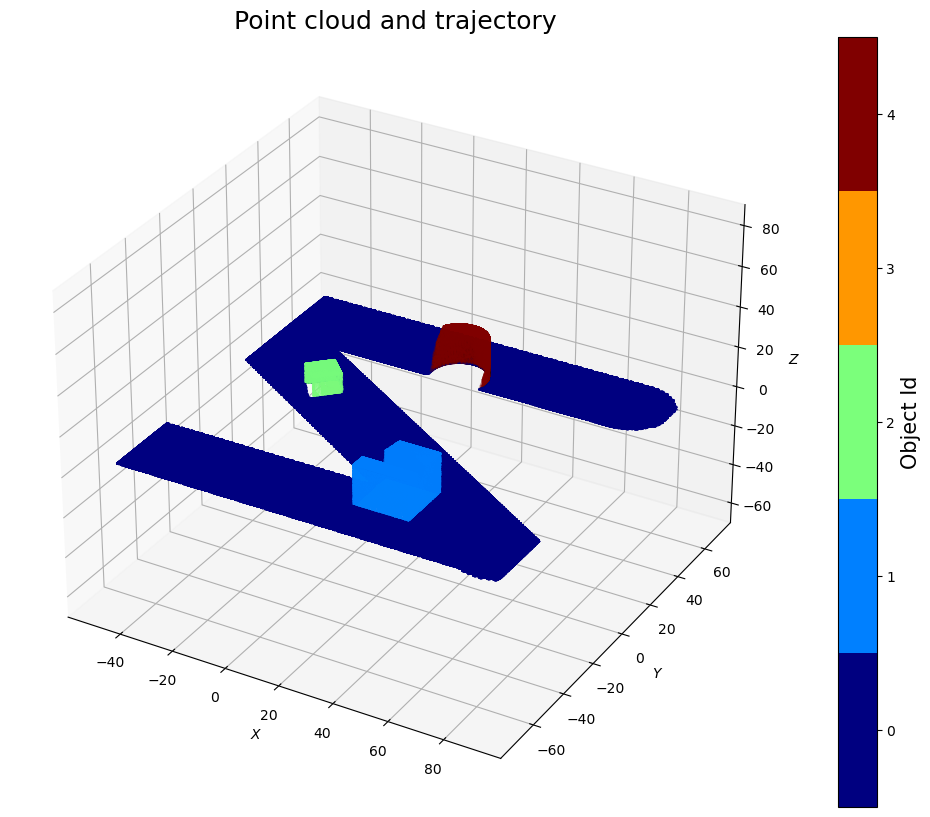

In [26]:
# Matplotlib figures.
fig = plt.figure(figsize=(15,10))


#settings for a discrete colorbar
N=5
cmap=plt.get_cmap('jet',N)

# Scatter plot of first scanner (coloured by hitObjectId).
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(strips[:, 0], strips[:, 1], strips[:, 2], c=strips[:, 8], cmap=cmap, s=0.02, label='scene')

# Plot of trajectory.
#ax.plot(traj[:,0], traj[:,1], traj[:,2], c = 'black', label = 'scanner trajectory')

# Add axis labels.
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')

set_axes_equal(ax)    

# Set title.
ax.set_title(label='Point cloud and trajectory',fontsize=18)

cbar = plt.colorbar(sc, ticks=[2/5, 6/5, 2, 2+4/5,4-2/5])

cbar.set_label("Object Id", fontsize=15)
cbar.ax.set_yticklabels(['0', '1', '2', '3', '4'])

# Display results
plt.show()
